<a href="https://colab.research.google.com/github/GoldenDein/GoldenDein/blob/main/Credit_risk_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [3]:
#The data is imported using the pandas library
riskdataset = pd.read_csv('credit_risk_dataset.csv')

In [5]:
riskdataset.shape

(32581, 12)

In [6]:
riskdataset.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [7]:
riskdataset.describe(include='all')

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581,31686.000000,32581,32581,32581.000000,29465.000000,32581.000000,32581.000000,32581,32581.000000
unique,NaN,NaN,4,NaN,6,7,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,RENT,NaN,EDUCATION,A,NaN,NaN,NaN,NaN,N,NaN
freq,NaN,NaN,16446,NaN,6453,10777,NaN,NaN,NaN,NaN,26836,NaN
mean,27.734600,6.607485e+04,NaN,4.789686,NaN,NaN,9589.371106,11.011695,0.218164,0.170203,NaN,5.804211
std,6.348078,6.198312e+04,NaN,4.142630,NaN,NaN,6322.086646,3.240459,0.413006,0.106782,NaN,4.055001
min,20.000000,4.000000e+03,NaN,0.000000,NaN,NaN,500.000000,5.420000,0.000000,0.000000,NaN,2.000000
25%,23.000000,3.850000e+04,NaN,2.000000,NaN,NaN,5000.000000,7.900000,0.000000,0.090000,NaN,3.000000
50%,26.000000,5.500000e+04,NaN,4.000000,NaN,NaN,8000.000000,10.990000,0.000000,0.150000,NaN,4.000000
75%,30.000000,7.920000e+04,NaN,7.000000,NaN,NaN,12200.000000,13.470000,0.000000,0.230000,NaN,8.000000


In [9]:
riskdataset['loan_status'].value_counts()

,count
loan_status,
0,25473
1,7108


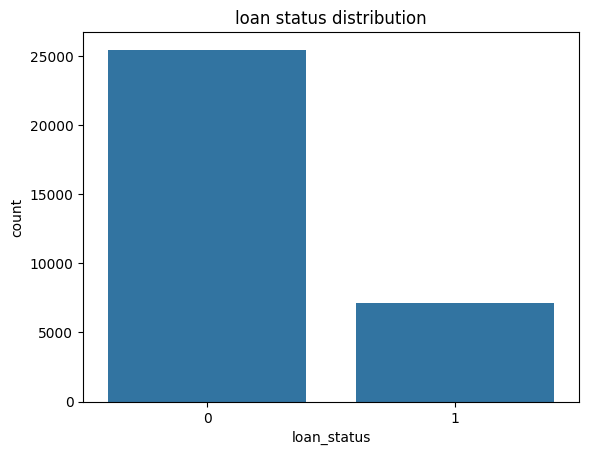

In [10]:
sns.countplot(x = riskdataset['loan_status'])
plt.title('loan status distribution')
plt.show()

<ipython-input-14-5ee78ff70b9c>:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  riskdataset[col].fillna(riskdataset[col].median(), inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning:

Class distribution after SMOTE:
loan_status
0    20401
1    20401
Name: count, dtype: int64


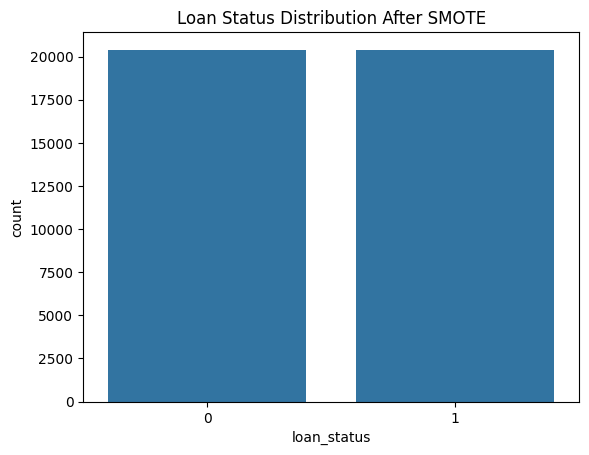

In [14]:
# prompt: smote for class inabalance

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Importing required libraries
# The data is imported using the pandas library
riskdataset = pd.read_csv('credit_risk_dataset.csv')

# Data preprocessing (handling missing values, encoding categorical features, etc.)
# Example: One-hot encode 'person_home_ownership'
riskdataset = pd.get_dummies(riskdataset, columns=['person_home_ownership'])

# Example: One-hot encode 'loan_intent'
riskdataset = pd.get_dummies(riskdataset, columns=['loan_intent'])

# Example: One-hot encode 'loan_grade'
riskdataset = pd.get_dummies(riskdataset, columns=['loan_grade'])

# Example: One-hot encode 'cb_person_default_on_file'
riskdataset = pd.get_dummies(riskdataset, columns=['cb_person_default_on_file'])

# Example: Fill missing numerical values with the median
numerical_cols = riskdataset.select_dtypes(include=np.number).columns
for col in numerical_cols:
  riskdataset[col].fillna(riskdataset[col].median(), inplace=True)

# Separate features (X) and target (y)
X = riskdataset.drop('loan_status', axis=1)
y = riskdataset['loan_status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())

# Visualize the class distribution after SMOTE
sns.countplot(x=y_train_smote)
plt.title('Loan Status Distribution After SMOTE')
plt.show()

# Now you can use X_train_smote and y_train_smote to train your model

In [16]:
#Standard Scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
#training the model with KNeighborsClassidier
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric= 'minkowski', p =2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
#prediction of test reuslts
y_pred=classifier.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [19]:
#Test Values
print(y_test)

14668    0
24614    0
11096    0
10424    1
26007    1
        ..
31330    0
2862     0
14754    0
14170    0
24385    0
Name: loan_status, Length: 6517, dtype: int64


Text(0.5, 1.0, 'Confusion Matrix')

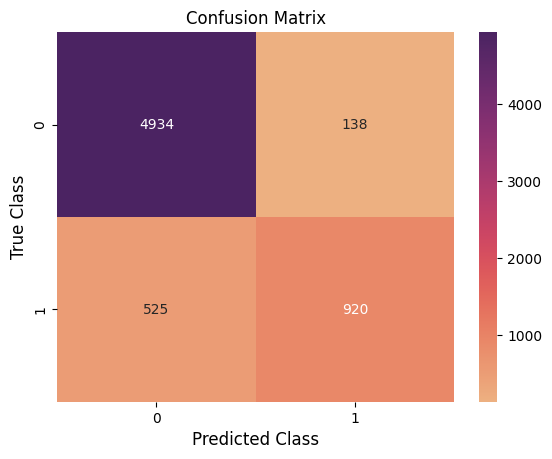

In [21]:
#Visualizing KNN model perfomance
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)

ax = sns.heatmap(confusion_matrix, cmap='flare',annot=True, fmt='d')
plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)

In [22]:
#Evaluating KNN model performance
from sklearn import metrics
result = metrics.classification_report(y_test,y_pred)
print('Classification Report:\n')
print(result)

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      5072
           1       0.87      0.64      0.74      1445

    accuracy                           0.90      6517
   macro avg       0.89      0.80      0.84      6517
weighted avg       0.90      0.90      0.89      6517

